In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

class Kmeans():
    """ 
    A class to cluster data using kmeans
    """
    
    def fit(self, x, n=5, n_iter = 20):
        """
        Fit the given data x to n clusters
        
        Kmeans will assign the data to the nearest cluster and then update the
        cluster centers. This process will repeat until the solution is steady (no 
        changes to cluster assignments/centers), or it has repeated for n_iter iterations
        """
        self.x = x        
        
        if x.shape[0] < n:
            print("Not enough data points for desired number of clusters")
            pass
        
        # Randomly initialize centers to data points
        self.kx = x[np.random.permutation(x.shape[0])[:n],:]
        
        # Initialize c_prev
        c_prev = np.zeros(x.shape[0])        
        for i in range(n_iter):            
            self.get_clusters()            
            if (self.c == c_prev).all():
                break # No updates, exit out
            self.update_centers()
            c_prev = self.c
            
    
    def get_clusters(self):
        """
        Assign all data points to nearest cluster using euclidean distance
        Results will be saved to self.c
        """
        
        # Euclidean distance between each point and each cluster center
        d = sum([np.abs(np.expand_dims(self.x[:,i], 0) - np.expand_dims(self.kx[:,i], 1)) for i in range(x.shape[1])])
        
        # Save cluster labels
        self.c = np.argmin(d, axis=0)
    
    def update_centers(self):
        """
        Assign each data point to the nearest cluster
        Result is saed to self.kx
        """
        
        self.kx = np.array([np.mean(self.x[self.c==i,:], axis=0) for i in range(self.kx.shape[0])])
    
    def display(self):
        """
        Plot the data and it's current cluster assignments
        """
        if self.x.shape[1] == 1:
            # 1D scatter plot
            plt.figure(figsize=(5, 1))
            plt.scatter(self.x[:,0], np.zeros(self.x.shape[0]), c=self.c)
            plt.scatter(self.kx[:,0], np.zeros(self.kx.shape[0]), c='r', marker='X')
            plt.axis('off')            
        elif self.x.shape[1] == 2:
            # 2D scatter plot
            plt.figure()
            plt.scatter(self.x[:,0], self.x[:,1], c=self.c)
            plt.scatter(self.kx[:,0], self.kx[:,1], c='r', marker='X')
        elif self.x.shape[1] == 3:
            # 3D line plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(self.x[:,0], self.x[:,1], self.x[:,2], c=self.c)
            ax.scatter(self.kx[:,0], self.kx[:,1], self.kx[:,2], c='r', marker='X')
        else:
            print('More than 3 features in data, cannot display')
            
            
        

<IPython.core.display.Javascript object>


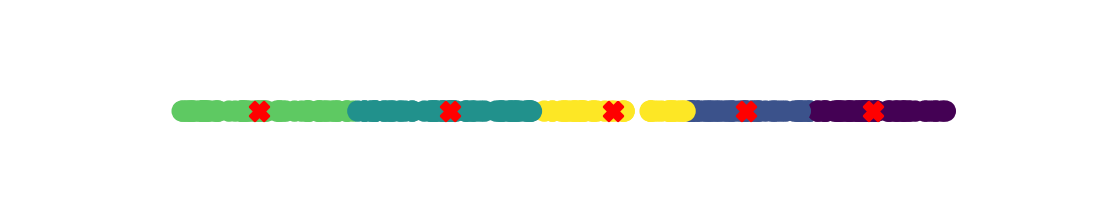

In [6]:
%matplotlib notebook

x = np.random.rand(300, 1)
kmeans = Kmeans()
kmeans.fit(x, n=5, n_iter=20)
kmeans.display()

<IPython.core.display.Javascript object>


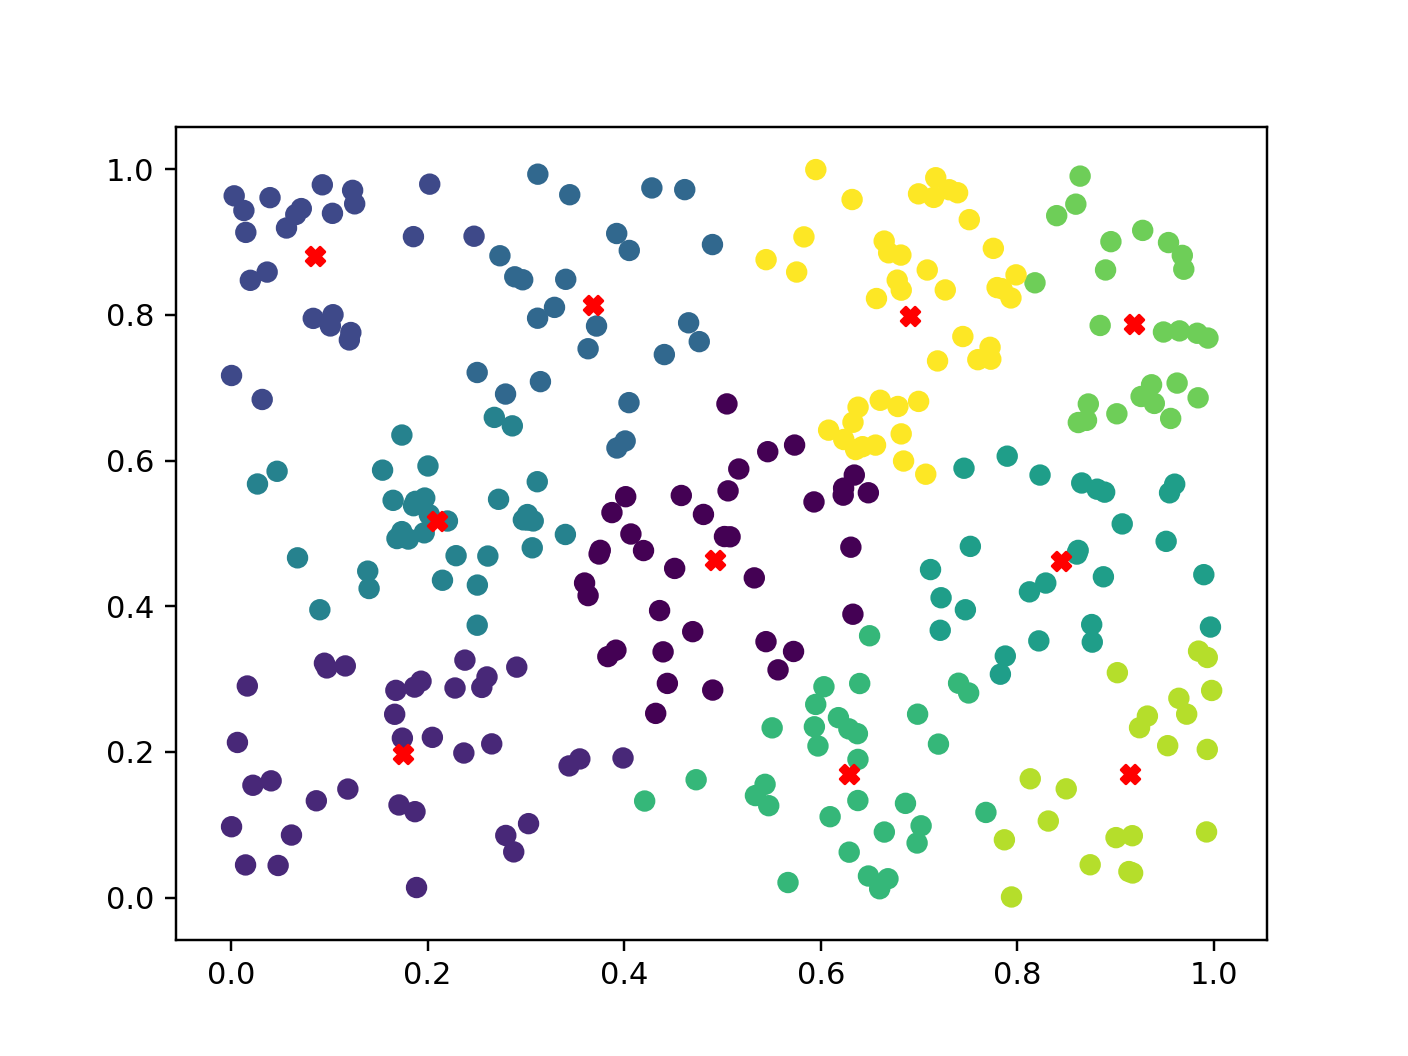

In [3]:
%matplotlib notebook

x = np.random.rand(300, 2)
kmeans = Kmeans()
kmeans.fit(x, n=10, n_iter=20)
kmeans.display()

<IPython.core.display.Javascript object>


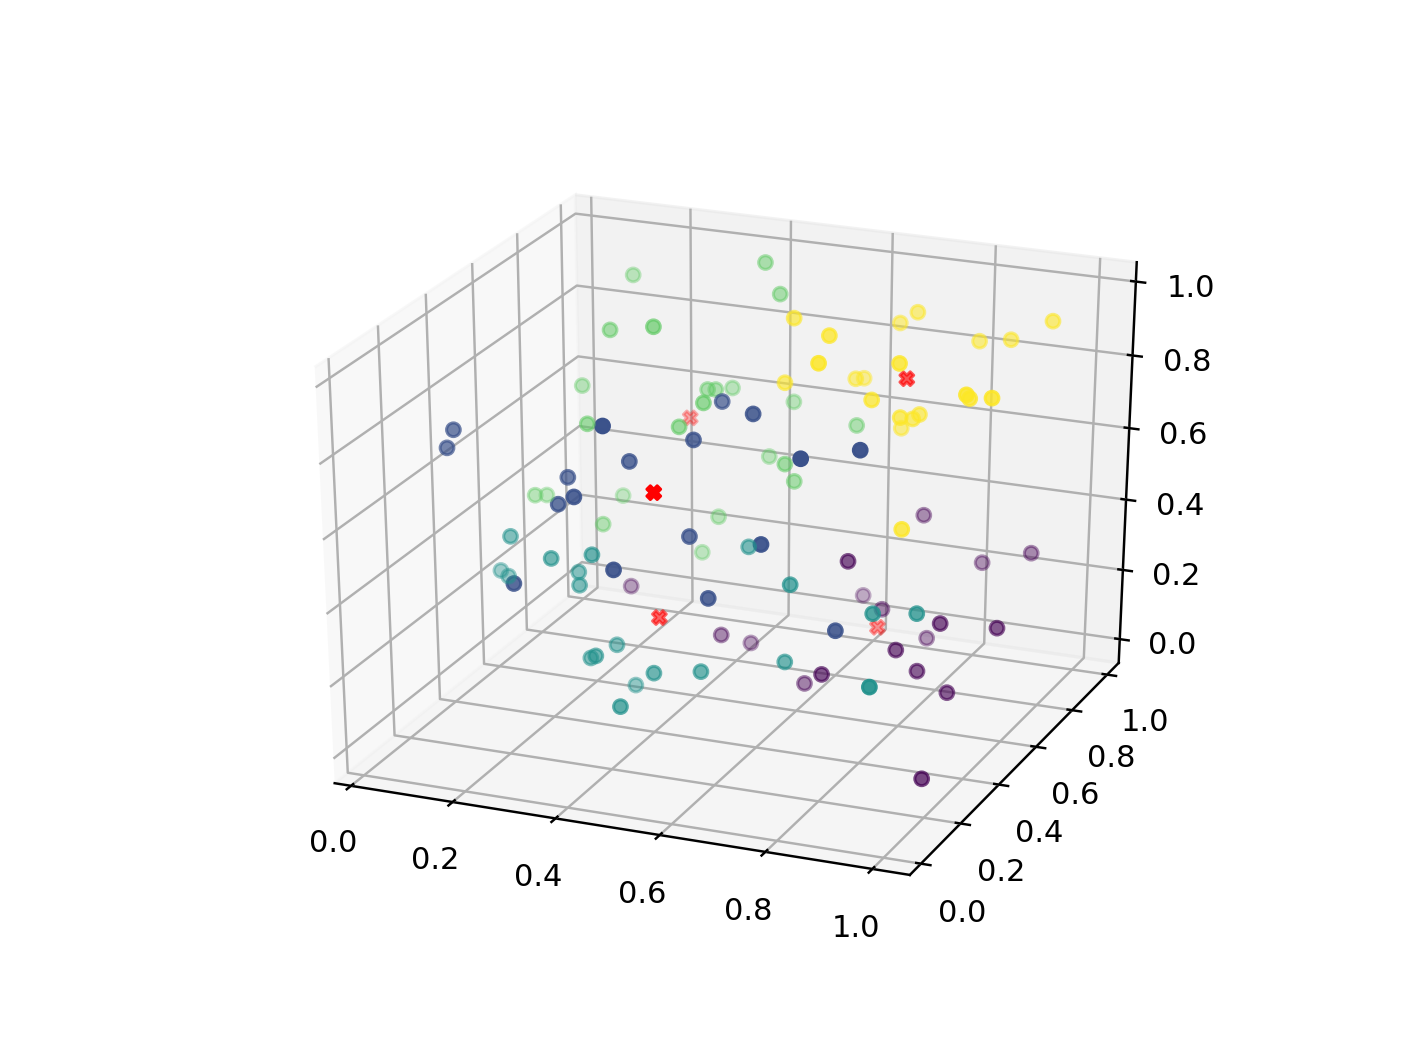

In [7]:
%matplotlib notebook

x = np.random.rand(100, 3)
kmeans = Kmeans()
kmeans.fit(x, n=5, n_iter=20)
kmeans.display()